In [1]:
# As we use our own external modules, we need the folder src to be in the PYTHONPATH env variable.
# However we do not expect the reader to add that folder to the env variable,
# therefore we manually load it temporarily in each notebook.
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
from modules.config import PATH_RESULTS_SUMMARY, PATH_RESULTS_VAR_TUPLE, PATH_RESULTS_VAR_REGION, N_REDUCED_SCNEARIOS
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
results = pd.read_pickle(PATH_RESULTS_SUMMARY)

In [4]:
results['fleet_size'] = results['kick_scooter'] + results['bicycle'] + results['car']

In [5]:
results

,status,objective,solver_runtime,n_trips_avg,n_unfilled_demand_avg,demand_avg,n_parking_avg,n_relocations_avg,kick_scooter,bicycle,car,relocations_disabled,non_anticipativity_disabled,fleet_size
0,Optimal,27179.691363,44.243824,7929.8125,1585.8125,9515.625,0.0000,26070.1875,10000,4000,3000,False,False,17000
1,Optimal,27382.469350,37.627232,7940.1875,1575.4375,9515.625,0.0000,26059.8125,10000,4000,3000,False,True,17000
2,Optimal,-183163.818782,31.332453,5360.1250,4155.5000,9515.625,28639.8750,0.0000,10000,4000,3000,True,False,17000
3,Optimal,-182933.448807,27.642780,5362.3125,4153.3125,9515.625,28637.6875,0.0000,10000,4000,3000,True,True,17000
4,Optimal,31639.020380,46.452361,7590.1250,1925.5000,9515.625,0.0000,18409.8750,8000,3000,2000,False,False,13000
5,Optimal,31888.696834,39.118114,7602.2500,1913.3750,9515.625,0.0000,18397.7500,8000,3000,2000,False,True,13000
6,Optimal,-121956.731577,31.810489,4568.3750,4947.2500,9515.625,21431.6250,0.0000,8000,3000,2000,True,False,13000
7,Optimal,-121888.438457,27.302864,4569.2500,4946.3750,9515.625,21430.7500,0.0000,8000,3000,2000,True,True,13000
8,Optimal,33268.265348,46.304055,7095.3750,2420.2500,9515.625,0.0000,10904.6250,6000,2000,1000,False,False,9000
9,Optimal,33554.975601,38.995524,7147.8750,2367.7500,9515.625,0.0000,10852.1250,6000,2000,1000,False,True,9000


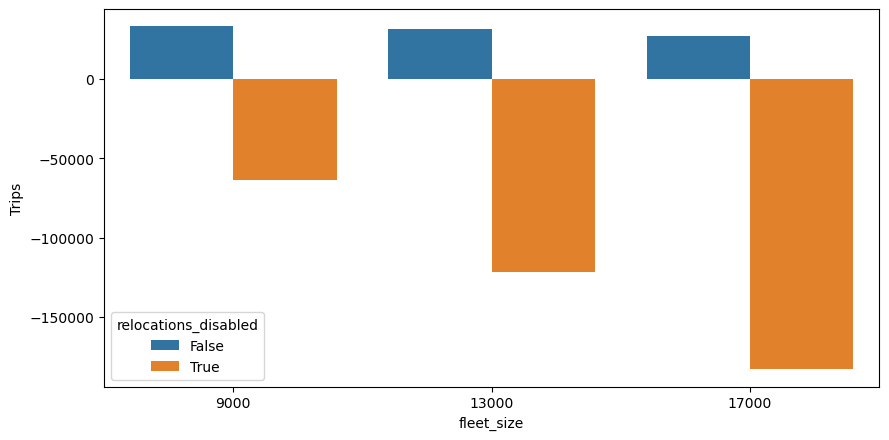

In [6]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.barplot(
    data=results[results["non_anticipativity_disabled"] == False],
    x="fleet_size",
    y="objective",
    hue="relocations_disabled",
)
ax.set(ylabel="Trips")
plt.show()


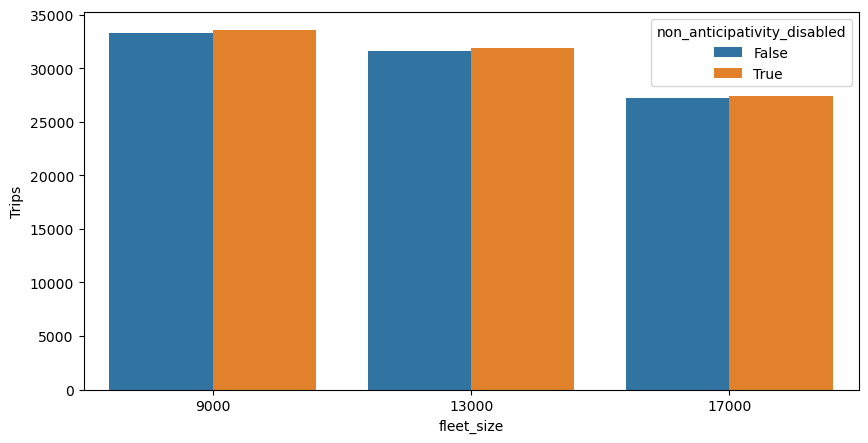

In [7]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.barplot(
    data=results[results["relocations_disabled"] == False],
    x="fleet_size",
    y="objective",
    hue="non_anticipativity_disabled",
)
ax.set(ylabel="Trips")
plt.show()


In [8]:
vars_by_region = pd.read_pickle(PATH_RESULTS_VAR_REGION)
vars_by_hex_tuple = pd.read_pickle(PATH_RESULTS_VAR_TUPLE)

In [9]:
vars_reset = vars_by_hex_tuple.reset_index()
relocations = vars_reset[vars_reset['start_hex_ids'] != vars_reset['end_hex_ids']]
# relocations.groupby('time')
relocations = relocations.rename(columns={'relocations/parking': 'relocations'})
print(relocations.groupby('time')['relocations'].sum() / N_REDUCED_SCNEARIOS, '\n')
print(relocations.groupby('vehicle_types')['relocations'].sum() / N_REDUCED_SCNEARIOS)

time
0     3359.0
12       0.0
Name: relocations, dtype: float64 

vehicle_types
bicycle          712.0
car              268.0
kick_scooter    2379.0
Name: relocations, dtype: float64
